# World Happiness Report Project

# Project Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 15
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.facecolor'] = 'orange'

In [18]:
data = pd.read_csv('happiness_score.csv')
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [19]:
data_columns = ['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity', 'Dystopia Residual']

In [20]:
data = data[data_columns].copy()

In [34]:
happy_df = data.rename({'Country':'country_name','Region':'region','Happiness Score':'happiness_score','Economy (GDP per Capita)':'GDP_per_capita','Family':'family','Health (Life Expectancy)':'healthy_life_expectancy','Freedom':'freedom_to_make_life_choices','Generosity':'Generosity','Dystopia Residual':'dystopia_residual', },axis =1)

In [35]:
happy_df.head()

,country_name,region,happiness_score,GDP_per_capita,family,healthy_life_expectancy,freedom_to_make_life_choices,Generosity,dystopia_residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,2.45176


In [23]:
happy_df.isnull().sum()

country_name                    0
region                          0
happiness_score                 0
GDP_per_capita                  0
family                          0
healthy_life_expectancy         0
freedom_to_make_life_choices    0
Generosity                      0
perceptions_of_corruption       0
dtype: int64

Text(0, 0.5, 'GDP per capita')

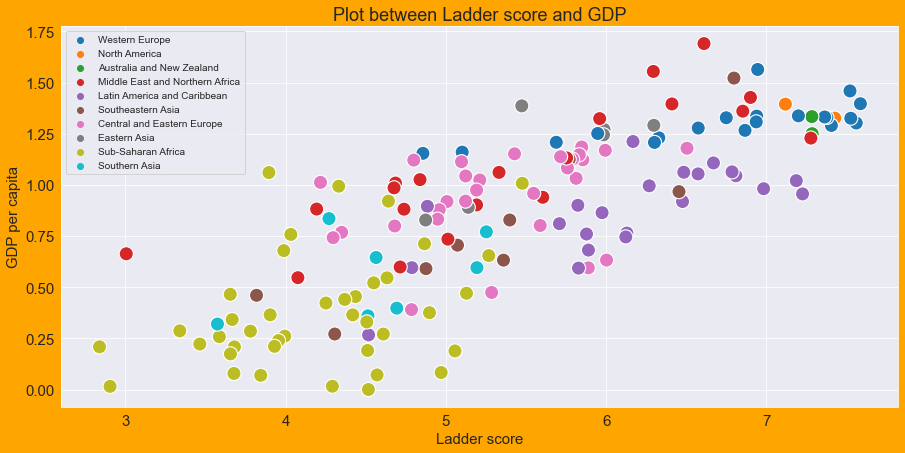

In [27]:
plt.rcParams['figure.figsize'] = (15,7)
plt.title('Plot between Ladder score and GDP')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.GDP_per_capita, hue = happy_df.region, s = 200);

plt.legend(loc = 'upper left',fontsize = '10')
plt.xlabel('Ladder score')
plt.ylabel('GDP per capita')

In [28]:
gdp_region = happy_df.groupby('region')['GDP_per_capita'].sum()
gdp_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_capita, dtype: float64

Text(0, 0.5, '')

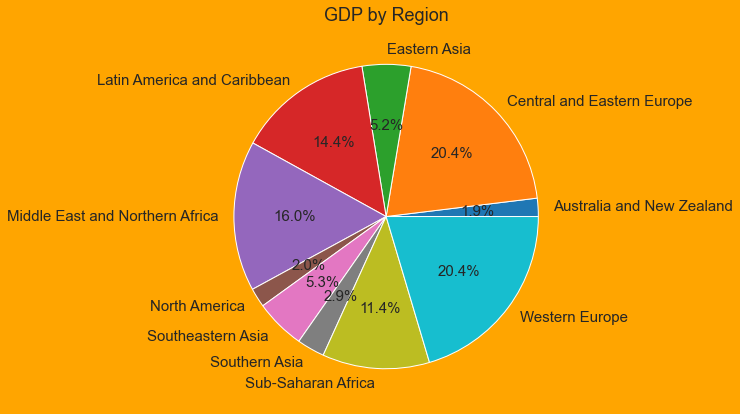

In [29]:
gdp_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [31]:
total_country = happy_df.groupby('region')[['country_name']].count()
print(total_country)

                                 country_name
region                                       
Australia and New Zealand                   2
Central and Eastern Europe                 29
Eastern Asia                                6
Latin America and Caribbean                22
Middle East and Northern Africa            20
North America                               2
Southeastern Asia                           9
Southern Asia                               7
Sub-Saharan Africa                         40
Western Europe                             21


C:\Users\user\AppData\Local\Temp/ipykernel_2140/2220227566.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool), cmap = 'Blues', square = True, ax = ax)


<AxesSubplot:>

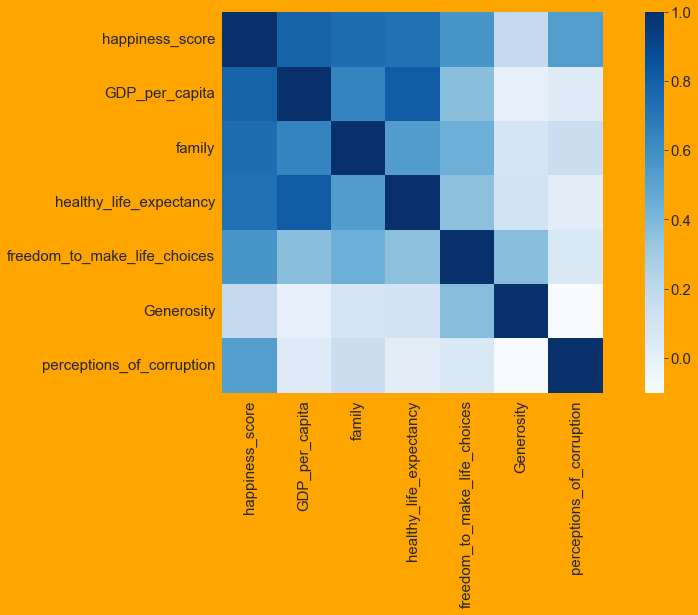

In [33]:
cor = happy_df.corr(method = 'pearson')
f, ax = plt.subplots(figsize = (15,7))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype = np.bool), cmap = 'Blues', square = True, ax = ax)

In [36]:
dystopia = happy_df.groupby('region')[['dystopia_residual']].mean()
dystopia

,dystopia_residual
region,
Australia and New Zealand,2.265355
Central and Eastern Europe,2.021400
Eastern Asia,1.681607
Latin America and Caribbean,2.622577
Middle East and Northern Africa,1.980008
North America,2.480935
Southeastern Asia,1.783020
Southern Asia,2.016769
Sub-Saharan Africa,2.019980


<BarContainer object of 10 artists>

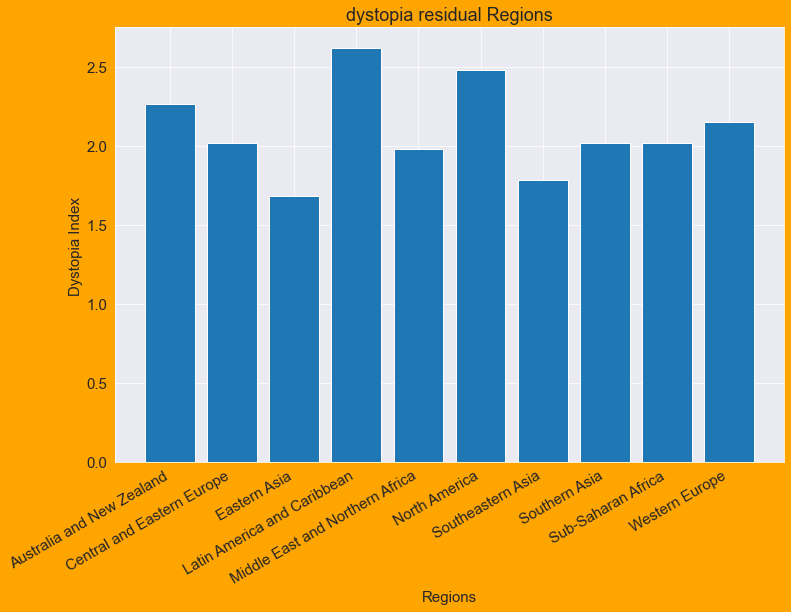

In [37]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('dystopia residual Regions')
plt.xlabel('Regions', fontsize = 15)
plt.ylabel('Dystopia Index ', fontsize = 15)
plt.xticks(rotation = 30,ha='right')
plt.bar(dystopia.index, dystopia.dystopia_residual)

In [40]:
generosity = happy_df.groupby('family')[['Generosity']].mean()
generosity

,Generosity
family,
0.00000,0.23835
0.13995,0.16681
0.30285,0.36510
0.35386,0.18260
0.38174,0.26475
...,...
1.34043,0.22837
1.34951,0.29678
1.36058,0.34139


<BarContainer object of 158 artists>

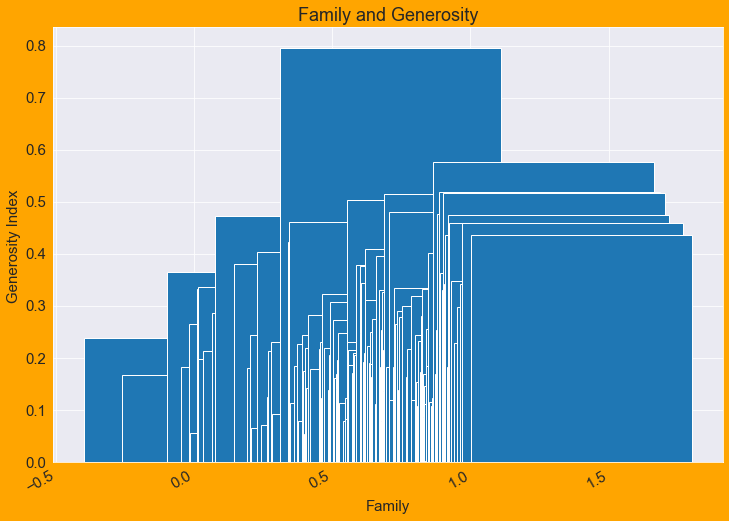

In [41]:
plt.rcParams['figure.figsize'] = (12,8)
plt.title('Family and Generosity')
plt.xlabel('Family', fontsize = 15)
plt.ylabel('Generosity Index ', fontsize = 15)
plt.xticks(rotation = 30,ha='right')
plt.bar(generosity.index, generosity.Generosity)